In [1]:
import time
import numpy as np
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, compile
from qiskit import Aer
from qiskit.tools.jupyter import *
from qiskit.providers.jobstatus import JobStatus, JOB_FINAL_STATES
# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

In [2]:
IBMQ.load_accounts()
IBMQ.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx4') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>]

In [3]:
backend = IBMQ.backends(name='ibmq_16_melbourne')[0]
print("The backend is " + backend.name())
simulator = Aer.get_backend('qasm_simulator')

The backend is ibmq_16_melbourne


# 0-2

In [4]:
q1 = QuantumRegister(3)
c1 = ClassicalRegister(3)
qc1 = QuantumCircuit(q1, c1)
#    for k in range(n):
#        qc.h(q[k])
qc1.measure(q1, c1)
layout = [0, 1, 2]
print(layout)

[0, 1, 2]


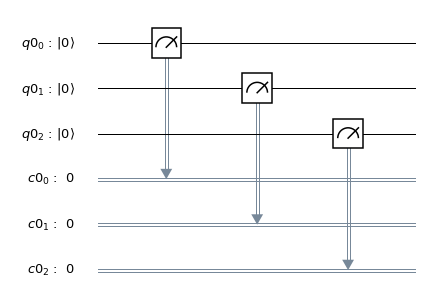

In [5]:
qc1.draw(output='mpl')

In [6]:
start_time = time.time()

In [7]:
job_1 = execute(qc1, backend=backend, initial_layout=layout, shots=8192)
counts_1 = job_1.result().get_counts(qc1)

In [8]:
print("--- %s seconds ---" % round(time.time() - start_time), 2)

--- 545 seconds --- 2


In [20]:
print(counts_1)

{'100': 7, '111': 1, '010': 74, '001': 200, '000': 7909, '011': 1}


In [34]:
qb02 = {}
qb021 = sum((v for k, v in counts_1.items() if k.endswith('0')), 0)
qb022 = sum((v for k, v in counts_1.items() if k.endswith('1')), 0)
qb023 = sum((v for k, v in counts_1.items() if k.endswith(('00' , '01'))), 0)
qb024 = sum((v for k, v in counts_1.items() if k.endswith(('10' , '11'))), 0)
qb025 = sum((v for k, v in counts_1.items() if k.startswith('0')), 0)
qb026 = sum((v for k, v in counts_1.items() if k.startswith('1')), 0)

qb02.update([('qb00', qb021),
             ('qb01', qb022),
             ('qb10', qb023),
             ('qb11', qb024),
             ('qb20', qb025), 
             ('qb21', qb026)])

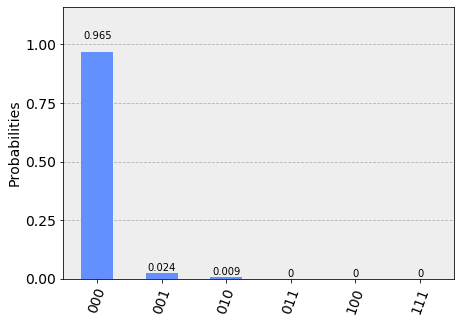

In [9]:
plot_histogram(counts_1) #raw data

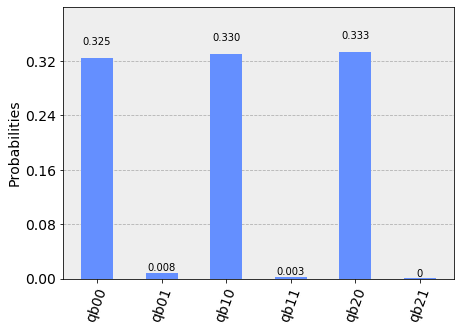

In [35]:
plot_histogram(qb02)

# 3-5

In [10]:
q2 = QuantumRegister(3)
c2 = ClassicalRegister(3)
qc2 = QuantumCircuit(q2, c2)
#    for k in range(n):
#        qc.h(q[k])
qc2.measure(q2, c2)
layout = [3, 4, 5]
print(layout)

[3, 4, 5]


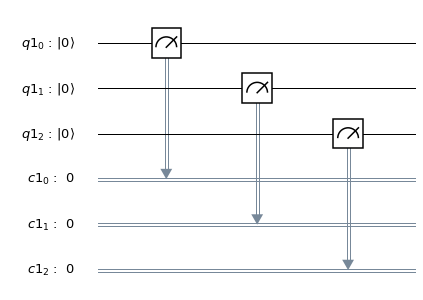

In [11]:
qc2.draw(output='mpl')

In [12]:
start_time = time.time()

In [13]:
job_2 = execute(qc2, backend=backend, initial_layout=layout, shots=8192)
counts_2 = job_2.result().get_counts(qc2)

In [19]:
print(counts_2)

{'010': 155, '001': 1363, '011': 68, '101': 356, '100': 1377, '111': 36, '110': 69, '000': 4768}


In [36]:
qb35 = {}
qb351 = sum((v for k, v in counts_2.items() if k.endswith('0')), 0)
qb352 = sum((v for k, v in counts_2.items() if k.endswith('1')), 0)
qb353 = sum((v for k, v in counts_2.items() if k.endswith(('00' , '01'))), 0)
qb354 = sum((v for k, v in counts_2.items() if k.endswith(('10' , '11'))), 0)
qb355 = sum((v for k, v in counts_2.items() if k.startswith('0')), 0)
qb356 = sum((v for k, v in counts_2.items() if k.startswith('1')), 0)

qb35.update([('qb30', qb351),
             ('qb31', qb352),
             ('qb40', qb353),
             ('qb41', qb354),
             ('qb50', qb355), 
             ('qb51', qb356)])

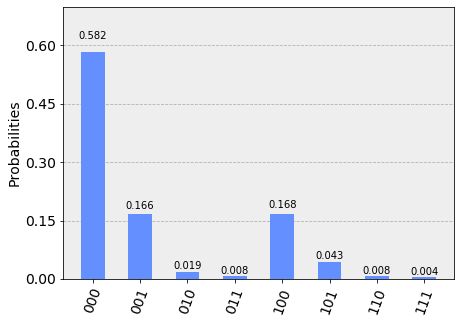

In [16]:
plot_histogram(counts_2) #raw data

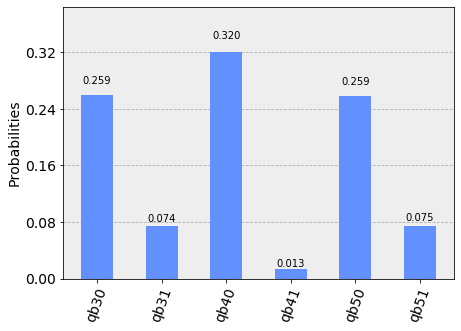

In [37]:
plot_histogram(qb35)

In [14]:
print("--- %s seconds ---" % round(time.time() - start_time), 2)

--- 578 seconds --- 2


# Simulation

In [17]:
backend=simulator
job_sim = execute(qc1, backend=backend, shots=8192)
counts_sim = job_sim.result().get_counts(qc1)

In [21]:
print(counts_sim)

{'000': 8192}


In [38]:
qbs = {}
qbs1 = sum((v for k, v in counts_sim.items() if k.endswith('0')), 0)
qbs2 = sum((v for k, v in counts_sim.items() if k.endswith('1')), 0)
qbs3 = sum((v for k, v in counts_sim.items() if k.endswith(('00' , '01'))), 0)
qbs4 = sum((v for k, v in counts_sim.items() if k.endswith(('10' , '11'))), 0)
qbs9 = sum((v for k, v in counts_sim.items() if k.startswith('0')), 0)
qbs10 = sum((v for k, v in counts_sim.items() if k.startswith('1')), 0)

qbs.update([('qb00', qbs1),
           ('qb01', qbs2),
           ('qb10', qbs3),
           ('qb11', qbs4),
           ('qb20', qbs9), 
           ('qb21', qbs10)])

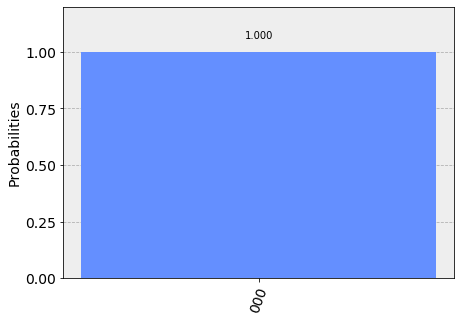

In [18]:
plot_histogram(counts_sim)

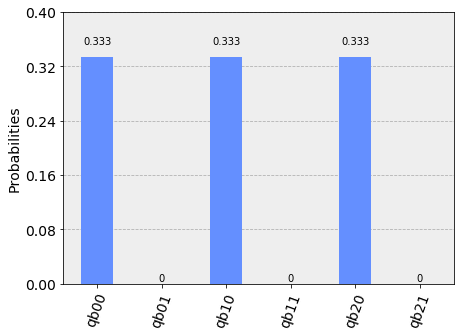

In [39]:
plot_histogram(qbs)

In [ ]:
#while job_list:
#    for job in job_list:
#        if job.status() in JOB_FINAL_STATES:
#            counts = job.result().get_counts()
#            print(counts)
#            job_list.remove(job)

In [ ]:
#job_exp = execute(qc, backend=backend, initial_layout=layout, shots=8192)

#start_time = time.time()
#job_status = job_exp.status()
#while job_status not in JOB_FINAL_STATES:
#    print(f'Status @ {time.time()-start_time:0.0f} s: {job_status.name},'
#          f' est. queue position: {job_exp.queue_position()}')
#    time.sleep(10)
#job_status = job_exp.status()

#counts = job_exp.result().get_counts(qc)

In [ ]:
#print(counts)

In [ ]:
#plot_histogram(counts)

In [ ]:
#job_sim = execute(qc, backend=simulator, shots=8192)
#counts_sim = job_sim.result().get_counts(qc)

In [ ]:
#print("\nTotal count for simulator:",counts_sim)

In [ ]:
#plot_histogram(counts_sim)